# 기본 import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 23

# 표들을 불러오기

In [2]:
sample_submission_V2 = pd.read_csv('./pubg-finish-placement-prediction/sample_submission_V2.csv')
test_V2 = pd.read_csv('./pubg-finish-placement-prediction/test_V2.csv')
train_V2 = pd.read_csv('./pubg-finish-placement-prediction/train_V2.csv')

In [3]:
sample_submission_V2

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [4]:
test_V2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,...,28,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,...,47,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,...,27,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,...,44,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,...,27,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,...,20,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,...,26,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,...,29,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,...,48,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [5]:
#so 모든 matchType을 모두 보던가 아님 합치던가
(test_V2['matchType'].nunique()) == (train_V2['matchType'].nunique())

True

In [6]:
FinalObj = pd.merge(test_V2, sample_submission_V2, on='Id')
FinalObj

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,9329eb41e215eb,676b23c24e70d6,45b576ab7daa7f,0,0,51.46,0,0,0,73,0,...,1500,0,0.0,0,0.000,0,0,588.00,1,0,1
1,639bd0dcd7bda8,430933124148dd,42a9a0b906c928,0,4,179.10,0,0,2,11,0,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0,1
2,63d5c8ef8dfe91,0b45f5db20ba99,87e7e4477a048e,1,0,23.40,0,0,4,49,0,...,1565,0,0.0,0,0.000,0,0,787.80,4,0,1
3,cf5b81422591d1,b7497dbdc77f4a,1b9a94f1af67f1,0,0,65.52,0,0,0,54,0,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0,1
4,ee6a295187ba21,6604ce20a1d230,40754a93016066,0,4,330.20,1,2,1,7,0,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,a316c3a13887d5,80e82180c90951,f276da5fd73536,1,2,381.00,3,0,7,4,1294,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526,1
1934170,5312146b27d875,147264a127c56e,fb77cbfe094a6b,0,0,0.00,0,0,0,64,1449,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496,1
1934171,fc8818b5b32ad3,7bbb4779ebedd5,efb74d5f6e9779,0,0,91.96,0,0,3,24,0,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0,1
1934172,a0f91e35f8458f,149a506a64c2b1,3a2cf335bc302f,1,2,138.60,0,0,12,25,0,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0,1


# 전처리

In [7]:
#유일한 NaN이 있는 row를 제거
Dwait = train_V2[train_V2['winPlacePerc'].notnull()]
Dwait

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,...,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,...,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,...,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,...,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,...,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,...,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,...,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,...,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,...,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000


In [8]:
Dwait.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

- Id = 플레이어의 Id
- groupId = 동일한 그룹인지 확인하는 Id입니다. 같은 그룹일지라도 다른 match에는 다른 groubid가 사용됩니다.
- matchId = match를 식별하기 위한 Id입니다. traning set과 testing set 모두 같은 match는 없습니다.
- assists = 내가 상대방을 죽이지 않았지만 상대방을 죽이는 것을 도왔을 때 스코어가 오릅니다! 직접적인 가해가 있어야지 스코어가 오릅니다! kill스코어와는 다릅니다.
- boosts = 부스트는 즉시 치유를 합니다.
- damageDealt = 가한 총 피해량 입니다.
- DBNOs = 상대방이 총을 맞고 체력을 모두 잃었을 경우 바닥에 기어다니며 팀원들의 소생을 기다리는 경우를 말합니다.
- headshotKills = 머리를 관통해서 상대방이 즉시 사망한 경우를 말합니다. 여기서 중요한 것은 '즉시' 사망했다는 것입니다.
- heals = 힐은 천천히 체력을 회복시킵니다.
- killPlace = 경기에서 처치한 적의 수 랭킹.
- killPoints = 플레이어의 처치 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, killPoints에서 0은 "없음"으로 처리되어야 한다.
- kills = 상대방을 죽인 횟수입니다.
- killStreaks = 짧은 시간안에 상대방을 죽인 횟수.
- longestKill = 사망 시 사망한 플레이어와 본인의 거리입니다.
- matchDuration = 경기 시간.
- matchType = 경기 종류(duo, quad ...). fpp is 1인칭, tpp is 3인칭, normal is 인칭 변경 가능
- maxPlace = 경기에서 가장 순위가 낮은 것에 대한 데이터. 이것은 순위를 건너뛸 수도 있기 때문에 numGroups와 일치하지 않을 수 있다.
- numGroups = 경기에 있는 팀의 수.
- rankPoints = Elo 방식의 플레이어 랭킹. 다음 버전의 API에서는 삭제될 예정이기 때문에 사용에 주의. '-1' 값은 순위가 "None" 이다.
- revives = 팀원을 소생시킨 횟수입니다. 헤드샷을 맞지 않고 체력이 모두 깎일 경우 기절상태가 될 때 살릴 수 있습니다.
- rideDistance = 차량을 타고 이동한 총 거리입니다.
- roadKills = 차량을 타고 상대방을 치여 죽인 스코어 입니다. 흔히 고라니킬 이라고 합니다.
- swimDistance = 수영하는 사람입니다.
- teamKills = 팀을 죽인 횟수입니다.
- vehicleDestroys = 파괴된 차량의 수 입니다.
- walkDistance = 도보로 이동한 총 거리입니다.
- weaponsAcquired = 무기를 줍는 횟수입니다.
- winPoints = 플레이어의 승리 기반 외부 랭킹 (Elo 방식의 순위). rankPoints에서 -1이 아닌 값이 있는 경우, winPoints에서 0은 "없음"으로 처리되어야 한다.
- winPlacePerc = target column

In [9]:
# 쓸데없는 column 제거
Dtrain = Dwait.drop(['Id', 'groupId', 'matchId', 'killPoints', 'rankPoints', 'winPoints'], axis=1)
Dtrain

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,1306,squad-fpp,28,26,0,0.0000,0,0.000,0,0,244.80,1,0.4444
1,0,0,91.47,0,0,0,57,0,0,0.00,1777,squad-fpp,26,25,0,0.0045,0,11.040,0,0,1434.00,5,0.6400
2,1,0,68.00,0,0,0,47,0,0,0.00,1318,duo,50,47,0,0.0000,0,0.000,0,0,161.80,2,0.7755
3,0,0,32.90,0,0,0,75,0,0,0.00,1436,squad-fpp,31,30,0,0.0000,0,0.000,0,0,202.70,3,0.1667
4,0,0,100.00,0,0,0,45,1,1,58.53,1424,solo-fpp,97,95,0,0.0000,0,0.000,0,0,49.75,2,0.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0,0.00,1873,squad-fpp,29,28,0,1292.0000,0,0.000,0,0,1019.00,3,0.1786
4446962,0,1,44.15,0,0,0,69,0,0,0.00,1435,solo,93,93,0,0.0000,0,0.000,0,0,81.70,6,0.2935
4446963,0,0,59.06,0,0,0,66,0,0,0.00,1321,squad-fpp,28,28,0,0.0000,0,2.184,0,0,788.70,4,0.4815
4446964,0,4,180.40,1,1,2,11,2,1,98.50,1373,squad-fpp,26,25,2,0.0000,0,0.000,0,0,2748.00,8,0.8000


In [10]:
#도보 이동 없이 무기 획득 3개 이상이라면 불법으로 판단
((Dtrain['walkDistance'] == 0) & (Dtrain['weaponsAcquired'] > 2)).sum()

5768

In [11]:
#rideDistance가 0인데 roadKills가 1 이상이라면?
((Dtrain['rideDistance'] == 0) & (Dtrain['roadKills'] > 0)).sum()

186

In [12]:
#다행이다
((Dtrain['matchType'].str.contains('solo')) & (Dtrain['revives'] > 0)).sum()

0

In [13]:
# boosts랑 heals가 item 기반이므로 도보 이동 없이 무기 획득 3개 이상이랑 같음
print(((Dtrain['walkDistance'] == 0) & (Dtrain['boosts'] > 2)).sum())
print(((Dtrain['walkDistance'] == 0) & (Dtrain['heals'] > 2)).sum())

118
492


In [14]:
pencil_a = (Dtrain[(Dtrain['walkDistance'] == 0) & ((Dtrain['weaponsAcquired'] > 2) | (Dtrain['boosts'] > 2) | (Dtrain['heals'] > 2))].index)
Dtrain_a = Dtrain.drop(pencil_a)

In [15]:
#matchType 각각의 개수
Dtrain_a['matchType'].value_counts()

squad-fpp           1756185
duo-fpp              996688
squad                626525
solo-fpp             536753
duo                  313591
solo                 177753
normal-squad-fpp      15996
crashfpp               6287
normal-duo-fpp         5406
flaretpp               2505
normal-solo-fpp        1490
flarefpp                718
normal-squad            439
crashtpp                371
normal-solo             277
normal-duo              191
Name: matchType, dtype: int64

In [16]:
Dtrain_b = Dtrain_a.copy()
Dtrain_b['winPlacePerc'] = round(Dtrain_a['winPlacePerc'] * 10)
Dtrain_b
# so winPlacePerc가 0에 가까울수록 1등 확률 낮고, 10에 가까울수록 1등 확률 높다.

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPlacePerc
0,0,0,0.00,0,0,0,60,0,0,0.00,1306,squad-fpp,28,26,0,0.0000,0,0.000,0,0,244.80,1,4.0
1,0,0,91.47,0,0,0,57,0,0,0.00,1777,squad-fpp,26,25,0,0.0045,0,11.040,0,0,1434.00,5,6.0
2,1,0,68.00,0,0,0,47,0,0,0.00,1318,duo,50,47,0,0.0000,0,0.000,0,0,161.80,2,8.0
3,0,0,32.90,0,0,0,75,0,0,0.00,1436,squad-fpp,31,30,0,0.0000,0,0.000,0,0,202.70,3,2.0
4,0,0,100.00,0,0,0,45,1,1,58.53,1424,solo-fpp,97,95,0,0.0000,0,0.000,0,0,49.75,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,0,0,0.00,1873,squad-fpp,29,28,0,1292.0000,0,0.000,0,0,1019.00,3,2.0
4446962,0,1,44.15,0,0,0,69,0,0,0.00,1435,solo,93,93,0,0.0000,0,0.000,0,0,81.70,6,3.0
4446963,0,0,59.06,0,0,0,66,0,0,0.00,1321,squad-fpp,28,28,0,0.0000,0,2.184,0,0,788.70,4,5.0
4446964,0,4,180.40,1,1,2,11,2,1,98.50,1373,squad-fpp,26,25,2,0.0000,0,0.000,0,0,2748.00,8,8.0


### 다음과 같이 분류
- train_V2, test_V2, sample_submission_V2 : 날 것
- Dwait : train_V2에서 유일한 NaN을 가진 row 제거
- Dtrain : Dwait에서 Id 3총사, Points 3총사 column을 제거
- Dtrain_a : Dtrain에서 (walkDistance == 0) & ((weaponsAcquired > 2) | (boosts > 2) | (heals > 2))인 모든 row를 제거
- Dtrain_b : Dtrain_a에서  winPlacePerc 모든 원소 10배 후 소수 첫 자리에서 반올림
- Dsquad : Dtrain_b에서 matchType에 squad라는 단어가 포함된 row만 선택
- Dduo : Dtrain_b에서 matchType에 duo라는 단어가 포함된 row만 선택
- Dsolo : Dtrain_b에서 matchType에 solo라는 단어가 포함된 row만 선택
- Dcf : Dtrain_b에서 matchType에 crash 또는 flare라는 단어가 포함된 row만 선택
- FinalObj : test_V2랑 sample_submission_V2를 merge한 것

In [29]:
Dsquad = Dtrain_b[Dtrain_b['matchType'].str.contains('squad')]
Dduo = Dtrain_b[Dtrain_b['matchType'].str.contains('duo')]
Dsolo = Dtrain_b[Dtrain_b['matchType'].str.contains('solo')]
Dcf = Dtrain_b[Dtrain_b['matchType'].str.contains('crash') | Dtrain_b['matchType'].str.contains('flare')]
D간단한연습 = Dtrain_b[Dtrain_b['matchType'] == 'normal-squad-fpp']
print(len(Dsquad), len(Dduo), len(Dsolo), len(Dcf), len(D간단한연습))

2399145 1315876 716273 9881 15996


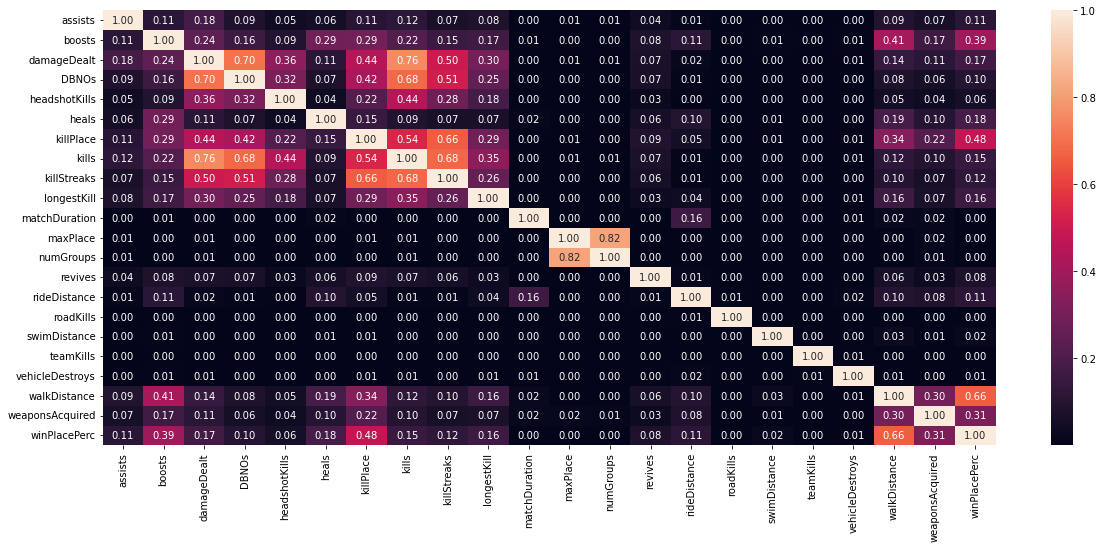

In [18]:
plt.figure(figsize=(20, 8))
sns.heatmap(Dsquad.corr() ** 2, annot=True, fmt=".2f")
plt.show()

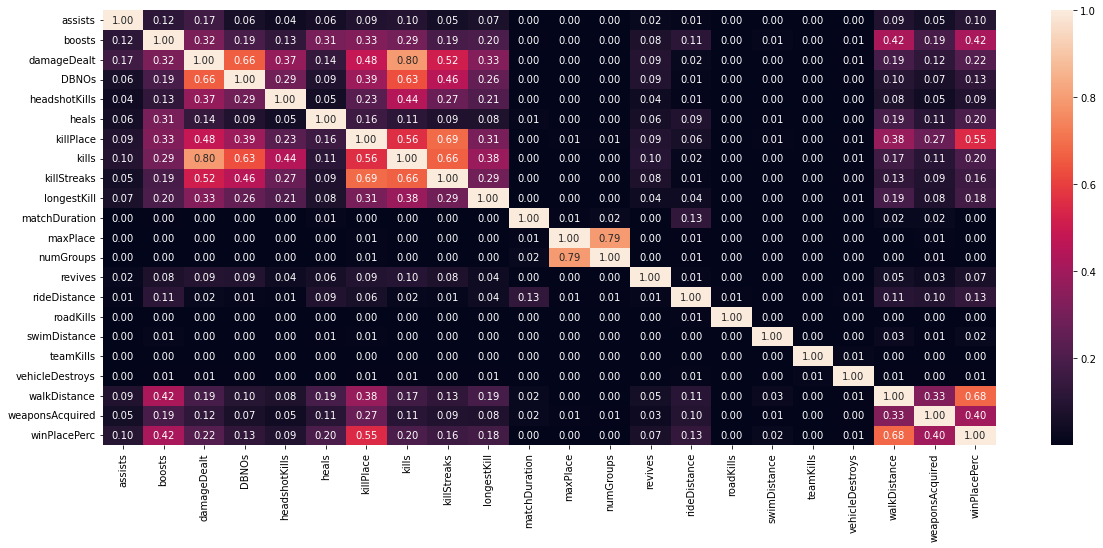

In [19]:
plt.figure(figsize=(20, 8))
sns.heatmap(Dduo.corr() ** 2, annot=True, fmt=".2f")
plt.show()

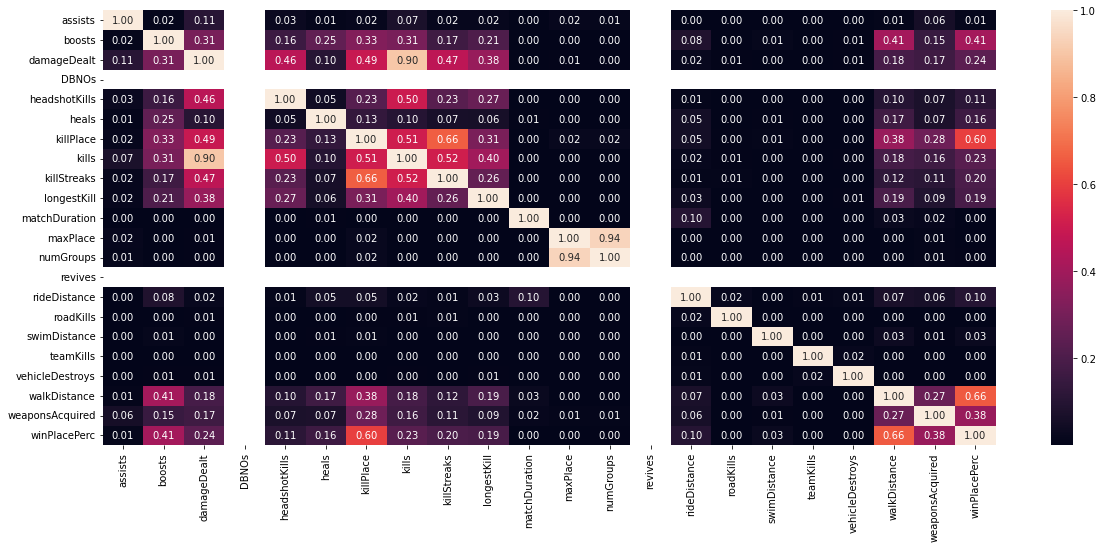

In [20]:
plt.figure(figsize=(20, 8))
sns.heatmap(Dsolo.corr() ** 2, annot=True, fmt=".2f")
plt.show()

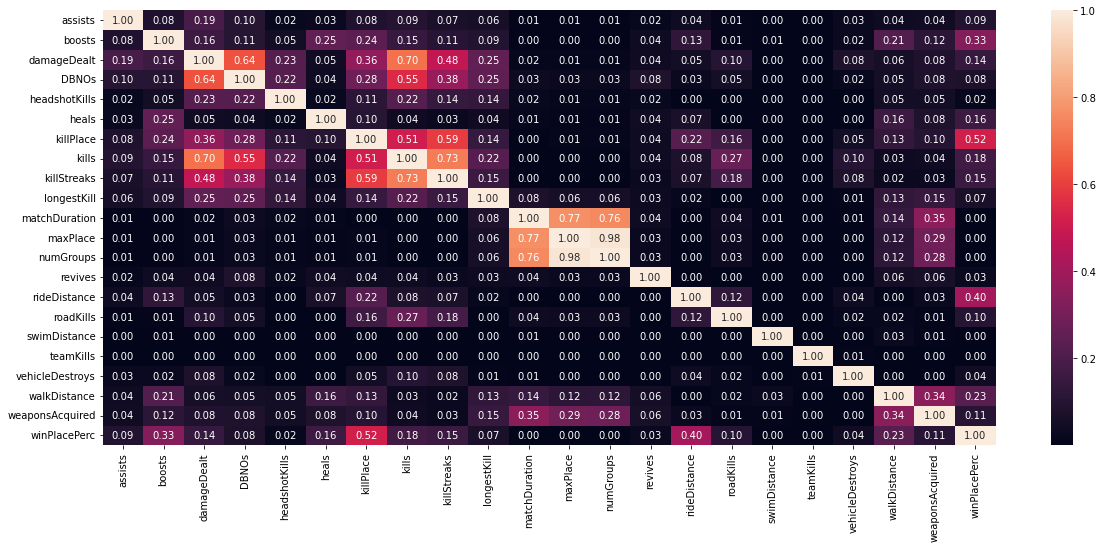

In [21]:
plt.figure(figsize=(20, 8))
sns.heatmap(Dcf.corr() ** 2, annot=True, fmt=".2f")
plt.show()

# 그림 그리기(대표 : Dsquad)
### 위 heatmap에서 winPlacePerc랑 관계 큰 6가지를 선택함

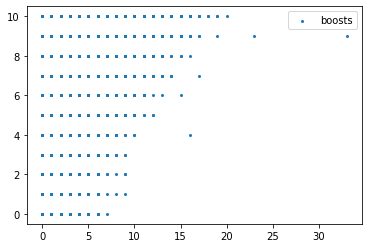

In [22]:
plt.scatter(Dsquad["boosts"], Dsquad["winPlacePerc"], label="boosts", s=4)
plt.legend()
plt.show()

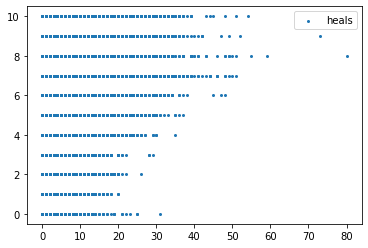

In [23]:
plt.scatter(Dsquad["heals"], Dsquad["winPlacePerc"], label="heals", s=4)
plt.legend()
plt.show()

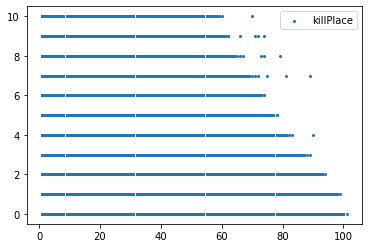

In [24]:
plt.scatter(Dsquad["killPlace"], Dsquad["winPlacePerc"], label="killPlace", s=4)
plt.legend()
plt.show()

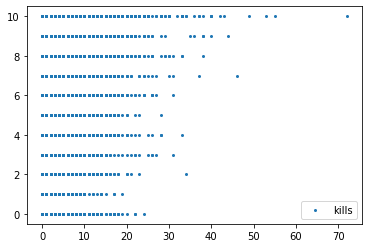

In [25]:
plt.scatter(Dsquad["kills"], Dsquad["winPlacePerc"], label="kills", s=4)
plt.legend()
plt.show()

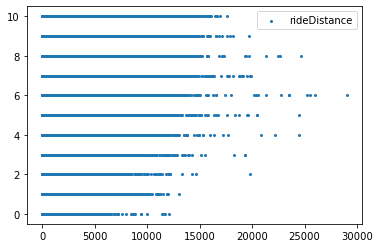

In [26]:
plt.scatter(Dsquad["rideDistance"], Dsquad["winPlacePerc"], label="rideDistance", s=4)
plt.legend()
plt.show()

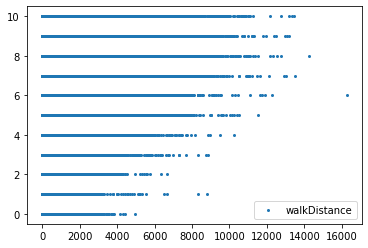

In [27]:
plt.scatter(Dsquad["walkDistance"], Dsquad["winPlacePerc"], label="walkDistance", s=4)
plt.legend()
plt.show()

# 모델에 대입하기(대표 : D간단한연습)

### LinearRegression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

In [31]:
for i in ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']:
    feature, target = D간단한연습[[i]], D간단한연습["winPlacePerc"]
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=1)
    model = LinearRegression().fit(feature, target)
    pred = model.predict(feature)
    mae = mean_absolute_error(pred, target)
    print(f'{i} column', np.round(mae, 3))

assists column 2.733
boosts column 2.697
damageDealt column 2.676
DBNOs column 2.793
headshotKills column 2.775
heals column 2.773
killPlace column 2.227
kills column 2.711
killStreaks column 2.652
longestKill column 2.709
matchDuration column 2.834
maxPlace column 2.834
numGroups column 2.833
revives column 2.802
rideDistance column 2.835
roadKills column 2.834
swimDistance column 2.834
teamKills column 2.835
vehicleDestroys column 2.816
walkDistance column 2.731
weaponsAcquired column 2.824


### 다중공선성

In [32]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'revives', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

In [33]:
model = LinearRegression().fit(feature, target)

In [34]:
pred = model.predict(feature)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

2.03

In [35]:
sm_feature = sm.add_constant(feature)

In [36]:
model = sm.OLS(target, sm_feature).fit()

In [37]:
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.392     
Dependent Variable: winPlacePerc     AIC:                75329.0422
Date:               2022-06-10 09:20 BIC:                75498.0043
No. Observations:   15996            Log-Likelihood:     -37643.   
Df Model:           21               F-statistic:        491.3     
Df Residuals:       15974            Prob (F-statistic): 0.00      
R-squared:          0.392            Scale:              6.4882    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               6.7703   0.1181  57.3122 0.0000  6.5387  7.0018
assists             0.2889   0.0174  16.5974 0.0000  0.2548  0.3230
boosts              0.1400   0.0149   9.4204 0.0000  0.1109  0.1691
damageDealt         0.0008   0.0002   5.2483 0.0000  0.0005  0.001

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,3.199316
1,boosts,3.257825
2,damageDealt,20.957810
3,DBNOs,2.116670
4,headshotKills,2.913334
5,heals,2.038748
6,killPlace,6.542761
7,kills,19.342488
8,killStreaks,6.008580
9,longestKill,1.978946


In [40]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,3.194652
1,boosts,3.244136
2,damageDealt,20.949782
3,DBNOs,2.090886
4,headshotKills,2.895281
5,heals,2.037275
6,killPlace,5.113851
7,kills,19.330295
8,killStreaks,5.483062
9,longestKill,1.971762


In [41]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,3.097766
1,boosts,3.013769
2,damageDealt,9.485756
3,DBNOs,2.044627
4,headshotKills,2.650085
5,heals,2.025903
6,killPlace,2.273703
7,killStreaks,4.830884
8,longestKill,1.932801
9,revives,1.457993


In [42]:
feature = D간단한연습[['assists', 'boosts', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,2.672577
1,boosts,3.008527
2,DBNOs,1.944608
3,headshotKills,2.098497
4,heals,2.001013
5,killPlace,2.248647
6,killStreaks,4.028586
7,longestKill,1.924270
8,revives,1.451460
9,rideDistance,2.331398


In [44]:
feature = D간단한연습[['assists', 'boosts', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]
sm_feature = sm.add_constant(feature)
model = sm.OLS(target, sm_feature).fit()
print(model.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.358     
Dependent Variable: winPlacePerc     AIC:                76196.8989
Date:               2022-06-10 09:22 BIC:                76327.4605
No. Observations:   15996            Log-Likelihood:     -38081.   
Df Model:           16               F-statistic:        557.3     
Df Residuals:       15979            Prob (F-statistic): 0.00      
R-squared:          0.358            Scale:              6.8521    
-------------------------------------------------------------------
                    Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
-------------------------------------------------------------------
const               6.3764   0.0936  68.1240 0.0000  6.1930  6.5599
assists             0.3513   0.0163  21.5704 0.0000  0.3194  0.3832
boosts              0.1401   0.0149   9.4066 0.0000  0.1109  0.1694
DBNOs              -0.0716   0.0076  -9.3967 0.0000 -0.0865 -0.056

In [45]:
pred = np.dot(sm_feature, model.params)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

2.11

### DecisionTree랑 RandomForest(RandomForest : 매우 느림)

In [46]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

dt_model = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)

In [49]:
pred = dt_model.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.37      0.38      0.37       495
         1.0       0.33      0.34      0.34       456
         2.0       0.15      0.14      0.14       398
         3.0       0.21      0.21      0.21       449
         4.0       0.15      0.16      0.16       376
         5.0       0.16      0.16      0.16       430
         6.0       0.11      0.12      0.12       374
         7.0       0.21      0.18      0.19       464
         8.0       0.14      0.15      0.14       379
         9.0       0.23      0.24      0.23       477
        10.0       0.33      0.31      0.32       501

    accuracy                           0.22      4799
   macro avg       0.22      0.22      0.22      4799
weighted avg       0.22      0.22      0.22      4799



In [50]:
# DecisionTree에 대한 것
scores = cross_val_score(dt_model, test_x, test_y, cv=10)
print(scores.mean(), scores.var())

0.20691457898399443 0.0002929595613784031


In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

rf_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

In [53]:
pred = rf_model.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.37      0.50      0.42       495
         1.0       0.39      0.48      0.43       456
         2.0       0.22      0.12      0.15       398
         3.0       0.25      0.23      0.24       449
         4.0       0.17      0.11      0.13       376
         5.0       0.20      0.21      0.20       430
         6.0       0.14      0.10      0.12       374
         7.0       0.22      0.19      0.20       464
         8.0       0.14      0.09      0.11       379
         9.0       0.31      0.36      0.33       477
        10.0       0.35      0.51      0.41       501

    accuracy                           0.28      4799
   macro avg       0.25      0.27      0.25      4799
weighted avg       0.26      0.28      0.26      4799



In [54]:
# RandomForestClassifier에 대한 것(매우 느림!)
scores = cross_val_score(rf_model, test_x, test_y, cv=10)
scores.mean(), scores.var()

(0.26714248434238, 0.00045750945292641197)

### LogisticRegression랑 KNeighborsClassifier(KNeighborsClassifier : 느림)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

inu1 = LogisticRegression(random_state=1).fit(train_x, train_y)
pred = inu1.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.26      0.57      0.36       495
         1.0       0.24      0.42      0.30       456
         2.0       0.00      0.00      0.00       398
         3.0       0.09      0.11      0.10       449
         4.0       0.00      0.00      0.00       376
         5.0       0.12      0.10      0.11       430
         6.0       0.25      0.00      0.01       374
         7.0       0.16      0.06      0.09       464
         8.0       0.11      0.01      0.02       379
         9.0       0.22      0.41      0.29       477
        10.0       0.26      0.46      0.34       501

    accuracy                           0.21      4799
   macro avg       0.16      0.20      0.15      4799
weighted avg       0.16      0.21      0.16      4799



/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWar

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

inu2 = KNeighborsClassifier().fit(train_x, train_y)
pred = inu2.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.24      0.48      0.32       495
         1.0       0.18      0.28      0.22       456
         2.0       0.10      0.11      0.10       398
         3.0       0.13      0.13      0.13       449
         4.0       0.11      0.09      0.10       376
         5.0       0.13      0.11      0.12       430
         6.0       0.08      0.06      0.07       374
         7.0       0.12      0.09      0.11       464
         8.0       0.13      0.09      0.11       379
         9.0       0.23      0.16      0.19       477
        10.0       0.22      0.16      0.19       501

    accuracy                           0.17      4799
   macro avg       0.15      0.16      0.15      4799
weighted avg       0.16      0.17      0.15      4799



### Lasso랑 Ridge랑 SGDClassifier

In [108]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [112]:
feature = D간단한연습[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = D간단한연습["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

train_x, X_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

In [113]:
reg1 = Lasso()
reg2 = Ridge()
clf = SGDClassifier()

reg1.fit(train_x, train_y)
reg2.fit(train_x, train_y)
clf.fit(train_x, train_y)

pred_train1 = reg1.predict(train_x)
pred_train2 = reg2.predict(train_x)
pred = clf.predict(train_x)

pred_val1 = reg1.predict(X_val)
pred_val2 = reg2.predict(X_val)

mse_train1 = mean_squared_error(train_y, pred_train1)
mse_val1 = mean_squared_error(y_val, pred_val1)
mse_train2 = mean_squared_error(train_y, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)


print("1. Lasso\t, train=%.4f, val=%.4f" % (mse_train1, mse_val1))
print("2. Ridge\t, train=%.4f, val=%.4f" % (mse_train2, mse_val2))
print("3. Linear Classifier, Accuracy for training : %.4f" % accuracy_score(train_y, pred))

1. Lasso	, train=7.0487, val=7.4718
2. Ridge	, train=6.8438, val=7.3444
3. Linear Classifier, Accuracy for training : 0.1196


# 모델 대입 Dsolo 버전

LinearRegression

In [59]:
for i in ['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']:
    feature, target = Dsolo[[i]], Dsolo["winPlacePerc"]
    train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=1)
    model = LinearRegression().fit(feature, target)
    pred = model.predict(feature)
    mae = mean_absolute_error(pred, target)b
    print(f'{i} column', np.round(mae, 3))

assists column 2.56
boosts column 1.908
damageDealt column 2.201
headshotKills column 2.411
heals column 2.332
killPlace column 1.431
kills column 2.209
killStreaks column 2.275
longestKill column 2.289
matchDuration column 2.578
maxPlace column 2.573
numGroups column 2.571
rideDistance column 2.417
roadKills column 2.575
swimDistance column 2.54
teamKills column 2.578
vehicleDestroys column 2.573
walkDistance column 1.4
weaponsAcquired column 1.88


다중공선성

In [60]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'maxPlace', 'numGroups', 'rideDistance',
       'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = Dsolo["winPlacePerc"]

model = LinearRegression().fit(feature, target)

pred = model.predict(feature)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

0.76

In [61]:
sm_feature = sm.add_constant(feature)

model = sm.OLS(target, sm_feature).fit()

print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.878       
Dependent Variable: winPlacePerc     AIC:                2097864.7171
Date:               2022-06-10 09:23 BIC:                2098094.3535
No. Observations:   716273           Log-Likelihood:     -1.0489e+06 
Df Model:           19               F-statistic:        2.705e+05   
Df Residuals:       716253           Prob (F-statistic): 0.00        
R-squared:          0.878            Scale:              1.0952      
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                4.8191   0.0175  274.9762 0.0000  4.7847  4.8534
assists              0.2498   0.0047   52.9257 0.0000  0.2406  0.2591
boosts               0.1176   0.0010  112.2261 0.0000  0.1156  0.1197
damageDealt          0.0005   0.0000   

In [62]:
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,1.290440
1,boosts,3.148566
2,damageDealt,17.282171
3,headshotKills,2.360233
4,heals,1.625272
5,killPlace,24.472744
6,kills,17.595830
7,killStreaks,7.250876
8,longestKill,2.255014
9,matchDuration,42.466207


In [63]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,1.265000
1,boosts,3.109656
2,damageDealt,17.183928
3,headshotKills,2.355590
4,heals,1.625185
5,killPlace,13.055953
6,kills,17.580953
7,killStreaks,5.033351
8,longestKill,2.253763
9,matchDuration,27.325634


In [64]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,1.240190
1,boosts,3.106997
2,damageDealt,16.857188
3,headshotKills,2.350527
4,heals,1.623268
5,killPlace,1.650274
6,kills,17.453813
7,killStreaks,3.389282
8,longestKill,2.246734
9,rideDistance,1.320164


In [65]:
feature = Dsolo[['assists', 'boosts', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
pd.DataFrame({
    "feature": feature.columns,
    "VIF": [variance_inflation_factor(feature.values, idx)
            for idx in range(feature.shape[1])]
})

,feature,VIF
0,assists,1.123606
1,boosts,2.910793
2,headshotKills,1.772825
3,heals,1.622088
4,killPlace,1.550579
5,killStreaks,2.542921
6,longestKill,2.095845
7,rideDistance,1.310132
8,roadKills,1.036438
9,swimDistance,1.059466


In [66]:
feature = Dsolo[['assists', 'boosts', 'headshotKills', 'heals',
       'killPlace', 'killStreaks', 'longestKill',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = Dsolo["winPlacePerc"]
sm_feature = sm.add_constant(feature)
model = sm.OLS(target, sm_feature).fit()
print(model.summary2())

                   Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.830       
Dependent Variable: winPlacePerc     AIC:                2332604.3057
Date:               2022-06-10 09:25 BIC:                2332776.5330
No. Observations:   716273           Log-Likelihood:     -1.1663e+06 
Df Model:           14               F-statistic:        2.502e+05   
Df Residuals:       716258           Prob (F-statistic): 0.00        
R-squared:          0.830            Scale:              1.5200      
---------------------------------------------------------------------
                     Coef.  Std.Err.     t     P>|t|   [0.025  0.975]
---------------------------------------------------------------------
const                7.5372   0.0097  779.7531 0.0000  7.5183  7.5562
assists             -0.0256   0.0052   -4.9197 0.0000 -0.0358 -0.0154
boosts               0.1384   0.0012  116.1165 0.0000  0.1361  0.1407
headshotKills       -0.0755   0.0028  -

In [67]:
pred = np.dot(sm_feature, model.params)
mae = np.round(mean_absolute_error(target, pred), 2)
mae

0.89

DecisionTree, RandomForest

In [68]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'revives', 'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = Dsolo["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

dt_model = DecisionTreeClassifier(random_state=0).fit(train_x, train_y)

pred = dt_model.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.74      0.74      0.74     14783
         1.0       0.63      0.63      0.63     21968
         2.0       0.52      0.53      0.53     21361
         3.0       0.44      0.44      0.44     20842
         4.0       0.40      0.40      0.40     21546
         5.0       0.35      0.35      0.35     20864
         6.0       0.33      0.32      0.33     20464
         7.0       0.31      0.31      0.31     19694
         8.0       0.32      0.32      0.32     20639
         9.0       0.40      0.40      0.40     21305
        10.0       0.42      0.42      0.42     11416

    accuracy                           0.44    214882
   macro avg       0.44      0.44      0.44    214882
weighted avg       0.44      0.44      0.44    214882



In [69]:
# DecisionTree에 대한 것
scores = cross_val_score(dt_model, test_x, test_y, cv=10)
print(scores.mean(), scores.var())

0.43339133782346595 7.493000360712931e-06


In [70]:
feature = Dsolo[['walkDistance']]
target = Dsolo["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

rf_model = RandomForestClassifier(random_state=0).fit(train_x, train_y)

pred = rf_model.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57     14783
         1.0       0.44      0.48      0.46     21968
         2.0       0.33      0.29      0.31     21361
         3.0       0.30      0.31      0.31     20842
         4.0       0.29      0.30      0.29     21546
         5.0       0.28      0.26      0.27     20864
         6.0       0.28      0.25      0.26     20464
         7.0       0.27      0.32      0.29     19694
         8.0       0.28      0.28      0.28     20639
         9.0       0.37      0.51      0.43     21305
        10.0       0.30      0.11      0.16     11416

    accuracy                           0.34    214882
   macro avg       0.34      0.33      0.33    214882
weighted avg       0.33      0.34      0.33    214882



In [71]:
# RandomForestClassifier에 대한 것
scores = cross_val_score(rf_model, test_x, test_y, cv=10)
scores.mean(), scores.var()

(0.3183095932439, 6.602518301717808e-06)

LogisticRegression, KNeighborsClassifier

In [72]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = Dsolo["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

inu1 = LogisticRegression(random_state=1).fit(train_x, train_y)
pred = inu1.predict(test_x)
print(classification_report(test_y, pred))

/Users/krc/miniforge3/envs/fastcampus/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.56      0.74      0.64     14783
         1.0       0.47      0.47      0.47     21968
         2.0       0.37      0.43      0.40     21361
         3.0       0.33      0.29      0.31     20842
         4.0       0.33      0.34      0.33     21546
         5.0       0.30      0.32      0.31     20864
         6.0       0.30      0.25      0.28     20464
         7.0       0.31      0.18      0.23     19694
         8.0       0.34      0.25      0.29     20639
         9.0       0.39      0.55      0.46     21305
        10.0       0.32      0.34      0.33     11416

    accuracy                           0.37    214882
   macro avg       0.37      0.38      0.37    214882
weighted avg       0.36      0.37      0.36    214882



In [74]:
feature = Dsolo[['walkDistance']]
target = Dsolo["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

inu2 = KNeighborsClassifier().fit(train_x, train_y)
pred = inu2.predict(test_x)
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

         0.0       0.52      0.62      0.57     14783
         1.0       0.40      0.44      0.42     21968
         2.0       0.30      0.29      0.29     21361
         3.0       0.26      0.27      0.26     20842
         4.0       0.25      0.26      0.26     21546
         5.0       0.23      0.24      0.24     20864
         6.0       0.24      0.22      0.23     20464
         7.0       0.23      0.21      0.22     19694
         8.0       0.26      0.27      0.27     20639
         9.0       0.34      0.36      0.35     21305
        10.0       0.24      0.12      0.16     11416

    accuracy                           0.30    214882
   macro avg       0.30      0.30      0.30    214882
weighted avg       0.29      0.30      0.30    214882



Lasso, Ridge, SGDClassifier

In [114]:
feature = Dsolo[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']]
target = Dsolo["winPlacePerc"]

train_x, test_x, train_y, test_y = train_test_split(feature, target, test_size=0.3, random_state=0)

train_x, X_val, train_y, y_val = train_test_split(train_x, train_y, test_size=0.25, random_state=0)

In [115]:
reg1 = Lasso()
reg2 = Ridge()
clf = SGDClassifier()

reg1.fit(train_x, train_y)
reg2.fit(train_x, train_y)
clf.fit(train_x, train_y)

pred_train1 = reg1.predict(train_x)
pred_train2 = reg2.predict(train_x)
pred = clf.predict(train_x)

pred_val1 = reg1.predict(X_val)
pred_val2 = reg2.predict(X_val)

mse_train1 = mean_squared_error(train_y, pred_train1)
mse_val1 = mean_squared_error(y_val, pred_val1)
mse_train2 = mean_squared_error(train_y, pred_train2)
mse_val2 = mean_squared_error(y_val, pred_val2)


print("1. Lasso\t, train=%.4f, val=%.4f" % (mse_train1, mse_val1))
print("2. Ridge\t, train=%.4f, val=%.4f" % (mse_train2, mse_val2))
print("3. Linear Classifier, Accuracy for training : %.4f" % accuracy_score(train_y, pred))

1. Lasso	, train=1.8807, val=1.8829
2. Ridge	, train=1.4937, val=1.5025
3. Linear Classifier, Accuracy for training : 0.2598


# sample_submission_V2에 모델 갖다대기
(대표 : Dsolo에서 했던 SGDClassifier(cif)와 Ridge(reg2)

In [123]:
result = reg2.predict(test_V2[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']])

In [124]:
서브미셔언 = sample_submission_V2.copy()
서브미셔언["winPlacePerc"] = result
서브미셔언

,Id,winPlacePerc
0,9329eb41e215eb,2.845953
1,639bd0dcd7bda8,8.663772
2,63d5c8ef8dfe91,5.414327
3,cf5b81422591d1,5.855075
4,ee6a295187ba21,9.513911
...,...,...
1934169,a316c3a13887d5,6.632297
1934170,5312146b27d875,4.441208
1934171,fc8818b5b32ad3,8.046141
1934172,a0f91e35f8458f,7.021443


In [125]:
result = clf.predict(test_V2[['assists', 'boosts', 'damageDealt', 'headshotKills', 'heals',
       'killPlace', 'kills', 'killStreaks', 'longestKill',
       'rideDistance', 'swimDistance', 'vehicleDestroys',
       'walkDistance', 'weaponsAcquired']])

In [126]:
서브미셔언 = sample_submission_V2.copy()
서브미셔언["winPlacePerc"] = result
서브미셔언

,Id,winPlacePerc
0,9329eb41e215eb,2.0
1,639bd0dcd7bda8,10.0
2,63d5c8ef8dfe91,5.0
3,cf5b81422591d1,2.0
4,ee6a295187ba21,9.0
...,...,...
1934169,a316c3a13887d5,2.0
1934170,5312146b27d875,2.0
1934171,fc8818b5b32ad3,9.0
1934172,a0f91e35f8458f,9.0


미친 경우의 수

1. Id 3총사, Point 3총사, matchType, winPlacePerc columm 제외한 나머지부터 시작.
2. 유의미해 보이는 column is solo일 경우 19개, duo랑 squad랑 (crash/flare)일 경우 21개.
3. so 경우의 수는 원소 개수가 (19 or 21)개인 집합의 공집합 아닌 부분집합 개수와 같다.

In [107]:
print((2 ** 19) - 1, (2 ** 21) - 1)

524287 2097151
